소프트웨어학부 20186663 전찬웅 - assignment7

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

In [26]:
theta = np.random.randn(100,1)
theta_2 = theta**2

In [27]:
xy_list = []
for i in range(10):
    for j in range(10):
        xy_list.append((pointX**i)*(pointY**j))
xy = np.array(xy_list)

In [28]:
label_np = np.array(label)
label_np = label_np.reshape(1,118)
cost1 = []
cost2 = []
cost3 = []
lamda1= 0.03
lamda2= 0.01
lamda3= 0.0001
theta1 = theta
theta2 = theta
theta3 = theta
learning_rate = 0.01

In [29]:
for i in range(10000):
    g_xy1 = (theta1*xy).sum(axis=0)
    g_xy1 = g_xy1.reshape(1,118)
    sigmoid_g1 = 1/(1+np.exp(-g_xy1))
    
    g_xy2 = (theta2*xy).sum(axis=0)
    g_xy2 = g_xy2.reshape(1,118)
    sigmoid_g2 = 1/(1+np.exp(-g_xy2))
    
    g_xy3 = (theta3*xy).sum(axis=0)
    g_xy3 = g_xy3.reshape(1,118)
    sigmoid_g3 = 1/(1+np.exp(-g_xy3))
    
    cost = np.sum(-label_np*np.log(sigmoid_g1)-(1-label_np)*np.log(1-sigmoid_g1))/len(pointX) + (lamda1/2)*np.sum(theta1**2)
    cost1.append(cost)
    cost = np.sum(-label_np*np.log(sigmoid_g2)-(1-label_np)*np.log(1-sigmoid_g2))/len(pointX) + (lamda2/2)*np.sum(theta2**2)
    cost2.append(cost)
    cost = np.sum(-label_np*np.log(sigmoid_g3)-(1-label_np)*np.log(1-sigmoid_g3))/len(pointX) + (lamda3/2)*np.sum(theta3**2)
    cost3.append(cost)
    for j in range(100):
        XY = xy[j,:]
        XY = XY.reshape((1,118))
        theta1[j,0] = theta1[j,0] - learning_rate*(np.sum((sigmoid_g1-label_np)*XY)/len(pointX) + lamda1*theta1[j,0])
        theta2[j,0] = theta2[j,0] - learning_rate*(np.sum((sigmoid_g2-label_np)*XY)/len(pointX) + lamda2*theta2[j,0])
        theta3[j,0] = theta3[j,0] - learning_rate*(np.sum((sigmoid_g3-label_np)*XY)/len(pointX) + lamda3*theta3[j,0])


# conclusion

- Plot the training data

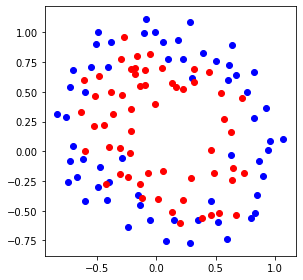

In [6]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

- Plot the training error with varying regularization parameters

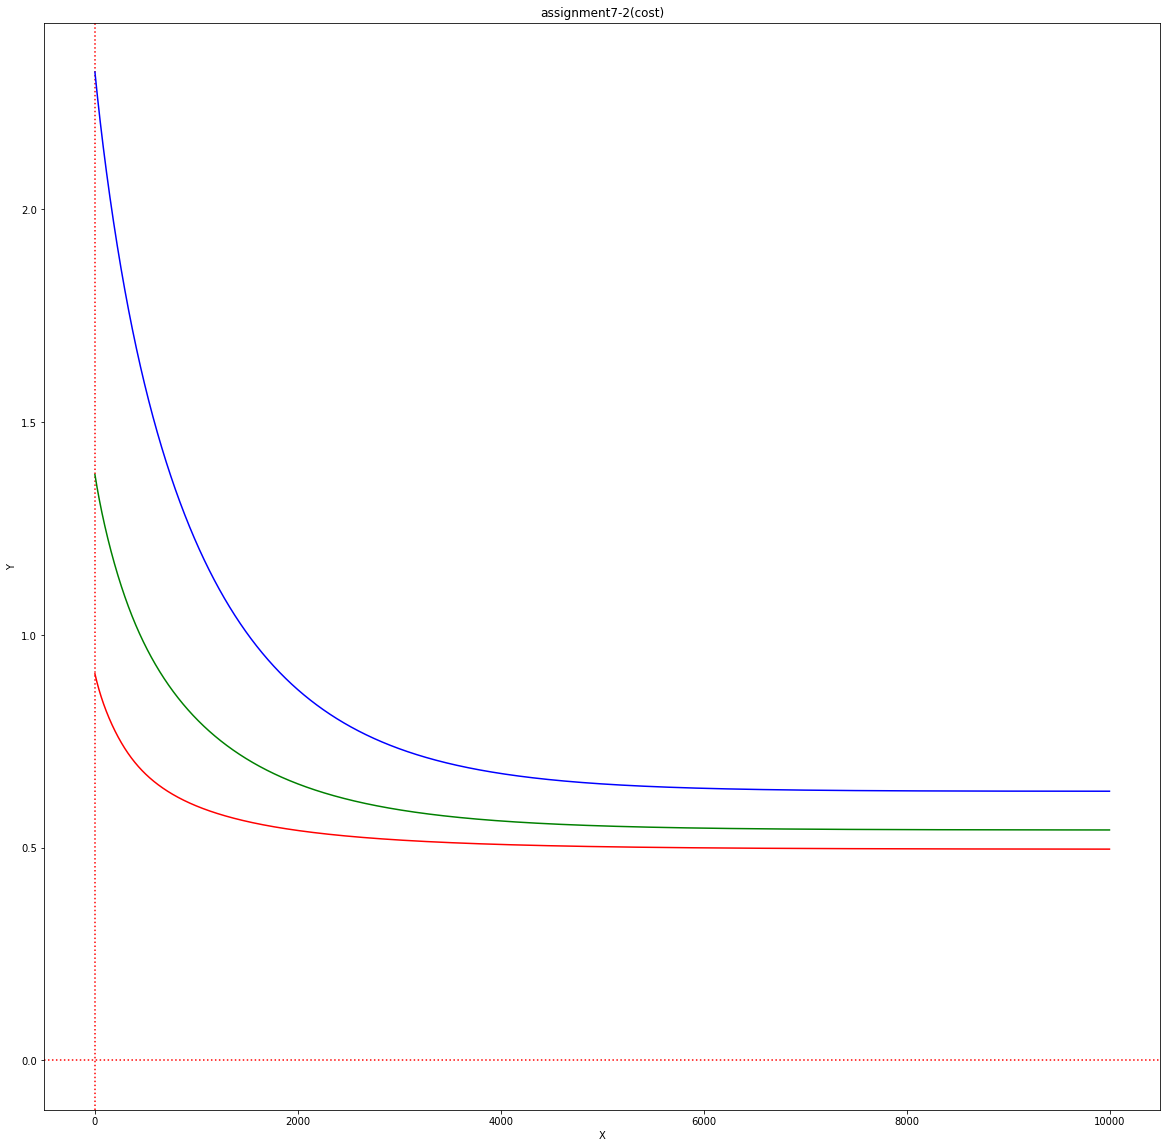

In [30]:
plt.figure(figsize=(20, 20))
plt.axvline(x=0, color = 'r',linestyle=':')
plt.axhline(y=0, color = 'r',linestyle=':')
plt.title("assignment7-2(cost)")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(range(10000),cost1,color='b')
plt.plot(range(10000),cost2,color='g')
plt.plot(range(10000),cost3,color='r')
plt.show()

- Display the values of the chosen regularization parameters

In [31]:
print("over-fitting lambda:",lamda3)
print("just-right lambda:",lamda2)
print("under-ftting lambda:",lamda1)

over-fitting lambda: 0.0001
just-right lambda: 0.01
under-ftting lambda: 0.03


- Plot the training accuracy with varying regularization parameters

- Display the final training accuracy with varying regularization parameters

- Plot the optimal classifier with varying regularization parameters superimposed on the training data